In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\raghu\\Downloads\\heart-1.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

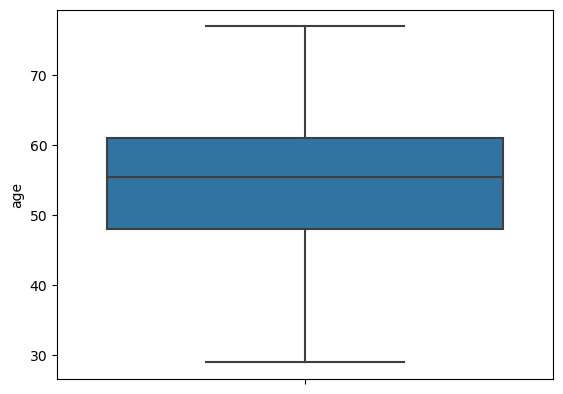

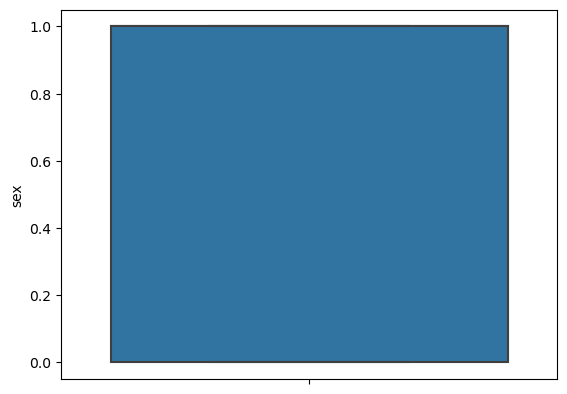

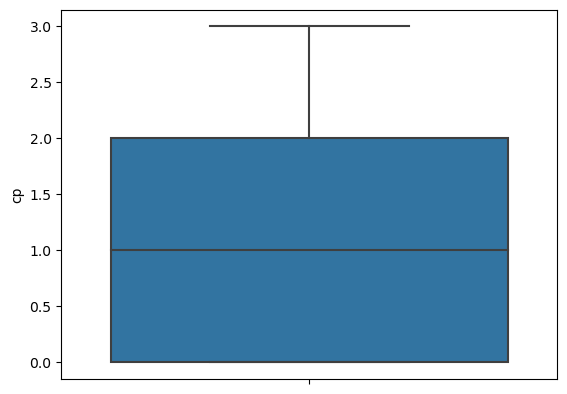

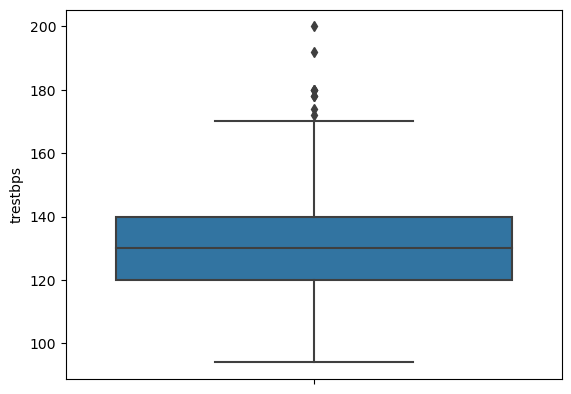

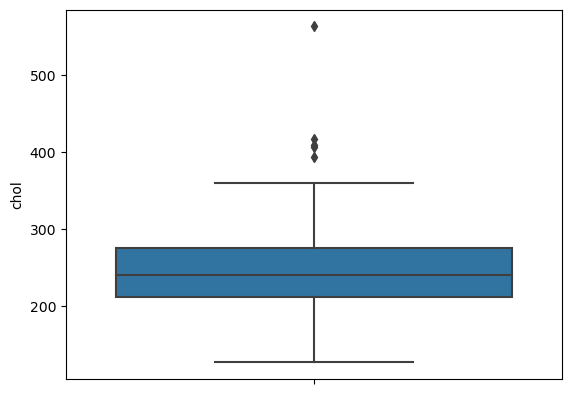

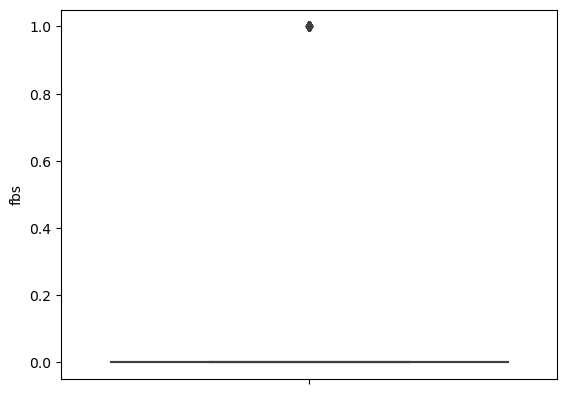

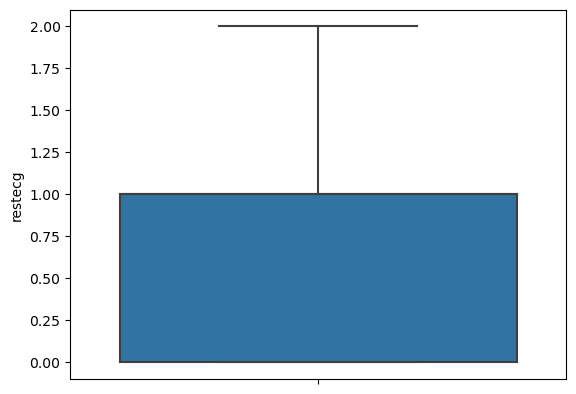

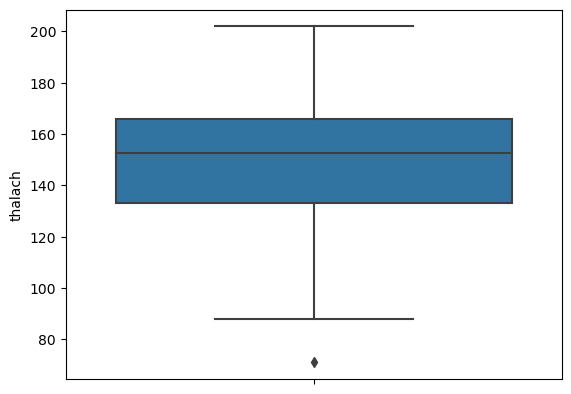

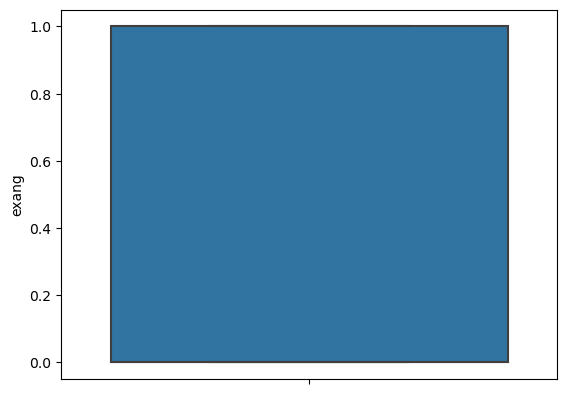

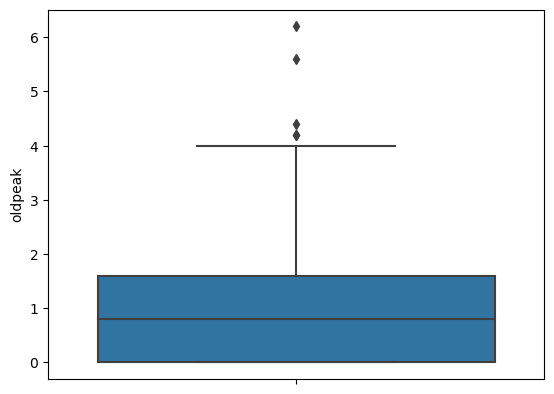

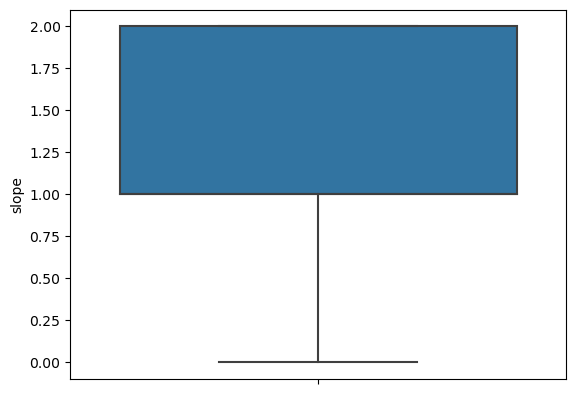

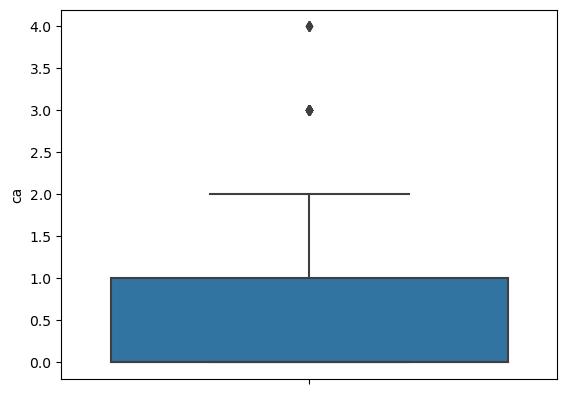

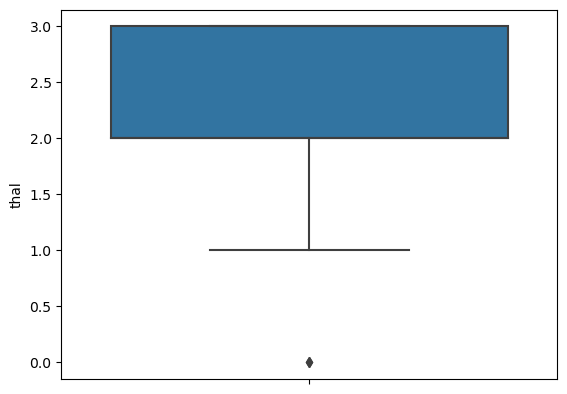

In [12]:
for i in data.columns:
    if i=="target":
        continue
    sns.boxplot(y=data[i])
    plt.show()

In [13]:
data.shape

(302, 14)

In [14]:
x=data.drop("target",axis=1)

In [15]:
y=data["target"]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [61]:
model=DecisionTreeClassifier()

In [62]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn.metrics import *
accuracy_score(y_test,y_pred)

0.7704918032786885

In [66]:
y_train_pred=model.predict(x_train)
accuracy_score(y_train_pred,y_train) #overfitting

1.0

In [67]:
model.get_depth()

8

In [68]:
#hyper parameter tuning
c_parameter='max_depth'
c_parameter_values = [i for i in range(1,16)]
df=pd.DataFrame(columns=['max_depth','accuracy'])
df

,max_depth,accuracy


In [69]:
for i in c_parameter_values:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    df=df.append({"max_depth":i,"accuracy":acc},ignore_index=True)

In [70]:
df

,max_depth,accuracy
0,1.0,0.770492
1,2.0,0.721311
2,3.0,0.836066
3,4.0,0.819672
4,5.0,0.819672
5,6.0,0.803279
6,7.0,0.770492
7,8.0,0.836066
8,9.0,0.786885
9,10.0,0.819672


In [71]:
model=DecisionTreeClassifier(max_depth=3)

In [72]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
y_pred=model.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred)

0.8360655737704918

[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.497\nsamples = 241\nvalue = [111, 130]'),
 Text(0.25, 0.625, 'X[11] <= 0.5\ngini = 0.396\nsamples = 114\nvalue = [83, 31]'),
 Text(0.125, 0.375, 'X[12] <= 2.5\ngini = 0.5\nsamples = 55\nvalue = [28, 27]'),
 Text(0.0625, 0.125, 'gini = 0.397\nsamples = 33\nvalue = [9, 24]'),
 Text(0.1875, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.375, 0.375, 'X[9] <= 0.4\ngini = 0.126\nsamples = 59\nvalue = [55, 4]'),
 Text(0.3125, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.4375, 0.125, 'gini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.75, 0.625, 'X[9] <= 1.95\ngini = 0.344\nsamples = 127\nvalue = [28, 99]'),
 Text(0.625, 0.375, 'X[0] <= 55.5\ngini = 0.266\nsamples = 114\nvalue = [18, 96]'),
 Text(0.5625, 0.125, 'gini = 0.111\nsamples = 68\nvalue = [4, 64]'),
 Text(0.6875, 0.125, 'gini = 0.423\nsamples = 46\nvalue = [14, 32]'),
 Text(0.875, 0.375, 'X[10] <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.

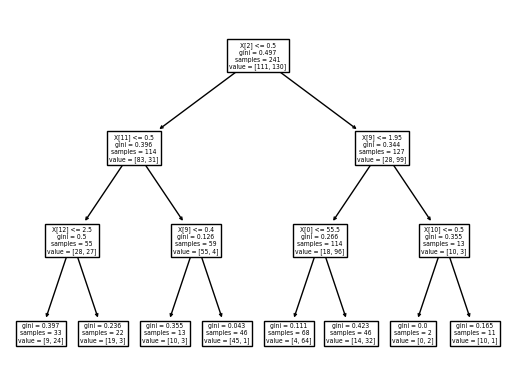

In [79]:
from sklearn.tree import plot_tree
plot_tree(model)

In [80]:
model.get_depth()

3